Atributos Discretos

In [5]:
#import urllib.request
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
#urllib.request.urlretrieve(url, 'car.data')

In [6]:
import numpy as np
data = np.loadtxt('/mnt/d/projetos/mestrado_ifes/reconhecimento_padroes/dataset/car.data', dtype='str', delimiter=',')
X, y = data[:,:-1], data[:,-1]
X.shape, y.shape

((1728, 6), (1728,))

In [7]:
combinacoes = 1
for i in range(X.shape[1]):
    valores = set(X[:,i])
    combinacoes *= len(valores)
    print(valores)
print(combinacoes)

{'low', 'med', 'vhigh', 'high'}
{'low', 'med', 'vhigh', 'high'}
{'5more', '3', '2', '4'}
{'more', '2', '4'}
{'med', 'small', 'big'}
{'low', 'med', 'high'}
1728


In [8]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

def maisFrequente(y):
    #print(Counter(y.flat).most_common(1)[0][0])
    return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
    def fit(self, X, y):
        self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]), dtype='<U5')
        y[:] = self.resposta
        return y

modelo = ZeroR()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.7002314814814815, array([ True,  True,  True, ...,  True, False, False]))

In [9]:
def impureza(y): #Gini
    labels = list(set(y))
    labels.sort()
    probabilidades = np.zeros((len(labels),))
    for i,k in enumerate(labels):
        probabilidades[i] = sum(y==k)/len(y)
    result = 1 - sum(probabilidades**2)
    return result

ytmp = y[:]
valor = impureza(ytmp)
valor

0.457283763074417

In [10]:
def impurezaValor(x, y, valor):
    iguais = x==valor
    impurezaIguais = impureza(y[iguais])
    propIguais = sum(iguais)/len(y)
    impurezaDiferentes = impureza(y[~iguais])
    propDiferentes = sum(~iguais)/len(y)
    impurezaTotal = propIguais*impurezaIguais + propDiferentes*impurezaDiferentes
    print(impurezaIguais)
    print(impurezaDiferentes)
    print(impurezaTotal)
    return impurezaTotal
impurezaValor(X[:,0],y,'vhigh')

0.2777777777777777
0.5065360177564395
0.44934645776177407


0.44934645776177407

In [11]:
def impurezaMinima(X, y):
    impurezas = []
    caracteristicasValores = []
    for i in range(X.shape[1]):
        valores = sorted(list(set(X[:,i])))
        for valor in valores:
            caracteristicasValores.append([i,valor])
            impurezasValorCaracteristica = impurezaValor(X[:,i], y, valor)
            impurezas.append(impurezasValorCaracteristica)
    caracteristicasValores = np.array(caracteristicasValores)
    impurezas = np.array(impurezas)
    menorimpureza = np.argmin(impurezas)
    caracteristica, valor = caracteristicasValores[menorimpureza]
    return impurezas[menorimpureza], int(caracteristica), valor
impurezaMinima(X, y)

0.375
0.4819303936137783
0.45519779521033377
0.5813936042524006
0.40788013450693494
0.45125850194330136
0.5378193587105624
0.42643913846974546
0.4542841935299497
0.2777777777777777
0.5065360177564395
0.44934645776177407
0.41170481824417005
0.4712350918305137
0.4563525234339278
0.5548268175582991
0.41970188424020727
0.45348311756973025
0.5378193587105624
0.42643913846974546
0.4542841935299497
0.2777777777777777
0.5065360177564395
0.44934645776177407
0.39363640260630994
0.4765434480262155
0.4558166866712391
0.4622878086419754
0.4555743693796678
0.45725272919524473
0.48349622770919065
0.4481631515775034
0.4569964206104252
0.48349622770919065
0.4481631515775034
0.4569964206104252
0.0
0.5792356891396606
0.38615712609310704
0.5818142361111112
0.364545657310957
0.43696851691100835
0.5762381847993827
0.3746202256944444
0.4418262120627572
0.5227623456790125
0.42038152247299376
0.45450846354166663
0.47829258294753085
0.4463508511766976
0.45699809510030864
0.3550889756944444
0.5011920693479939
0.

(0.38615712609310704, 3, '2')

In [12]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.impureza,self.caracteristica,self.valor = impurezaMinima(X,y)
        iguais = X[:,self.caracteristica] == self.valor
        if sum(iguais)>0 and sum(~iguais)>0:
            self.iguais = Arvore()
            self.iguais.fit(X[iguais,:],y[iguais])
            self.diferentes = Arvore()
            self.diferentes.fit(X[~iguais,:],y[~iguais])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]), dtype='<U5')
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            iguais = X[:,self.caracteristica] == self.valor
            y[iguais] = self.iguais.predict(X[iguais,:])
            y[~iguais] = self.diferentes.predict(X[~iguais,:])
        return y



In [13]:
modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

0.375
0.4819303936137783
0.45519779521033377
0.5813936042524006
0.40788013450693494
0.45125850194330136
0.5378193587105624
0.42643913846974546
0.4542841935299497
0.2777777777777777
0.5065360177564395
0.44934645776177407
0.41170481824417005
0.4712350918305137
0.4563525234339278
0.5548268175582991
0.41970188424020727
0.45348311756973025
0.5378193587105624
0.42643913846974546
0.4542841935299497
0.2777777777777777
0.5065360177564395
0.44934645776177407
0.39363640260630994
0.4765434480262155
0.4558166866712391
0.4622878086419754
0.4555743693796678
0.45725272919524473
0.48349622770919065
0.4481631515775034
0.4569964206104252
0.48349622770919065
0.4481631515775034
0.4569964206104252
0.0
0.5792356891396606
0.38615712609310704
0.5818142361111112
0.364545657310957
0.43696851691100835
0.5762381847993827
0.3746202256944444
0.4418262120627572
0.5227623456790125
0.42038152247299376
0.45450846354166663
0.47829258294753085
0.4463508511766976
0.45699809510030864
0.3550889756944444
0.5011920693479939
0.

(1.0, array([ True,  True,  True, ...,  True,  True,  True]))

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

0.36606354447180656
0.49334612538033495
0.45401930769007326
0.5813936042524006
0.3885052631578948
0.44880031623519323
0.4799634202103338
0.4442274671591958
0.4547000149057304
0.0
0.4852099523313571
0.44378102731319496
0.4830534291133145
0.4441980266715282
0.45316682072285225
0.4746580411721171
0.445794
0.45377233844265463
0.48604539855157747
0.4464199881023202
0.45665607459319196
0.345679012345679
0.48755721999278157
0.4542948905588733
0.38750181448686316
0.47696870748299314
0.45547593724079694
0.4585255198487713
0.4564572718759794
0.4569735855884347
0.48174933645019113
0.44831371988247926
0.4568056890686347
0.4897060231734175
0.4453076503807778
0.4566803160599344
0.0
0.5869090060931796
0.3792400451817724
0.5866102589075561
0.36232104782211394
0.4343792314125165
0.5867828036567279
0.36766001638159707
0.4388511390201888
0.5195101417495498
0.4232466181061395
0.4547307806870523
0.4791185749461372
0.4457174311584231
0.4567383584863519
0.36318075806939776
0.49975014069747137
0.4529094117787

(array([0.62716763, 0.73121387, 0.75144509, 0.75362319, 0.8057971 ]),
 0.7338493758900897)

Atributos contínuos

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data[:,2:], iris.target


dtype('float64')

In [16]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

def maisFrequente(y):
    #print(Counter(y.flat).most_common(1)[0][0])
    return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
    def fit(self, X, y):
        self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        y[:] = self.resposta
        return y

modelo = ZeroR()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.3333333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

In [17]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def __init__(self):
        #self.caracteristica, self.valor = 0, 2.5
        self.caracteristica = 0
    def fit(self, X, y):
        self.valor = np.mean(X[:, self.caracteristica])
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore()
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore()
            self.menores.fit(X[~maiores,:],y[~maiores])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y



In [18]:
modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9533333333333334,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

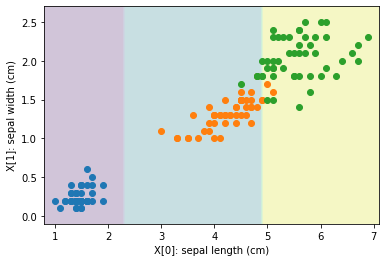

In [19]:
import matplotlib.pyplot as plt

def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{iris.target_names[k]} [{k}]")

    plt.xlabel(f"X[0]: {iris.feature_names[0]}")
    plt.ylabel(f"X[1]: {iris.feature_names[1]}")
    plt.show()

plotDecisao(Arvore(), X, y)

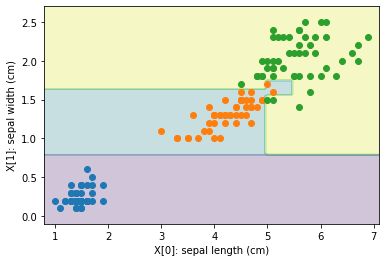

In [20]:
from sklearn.tree import DecisionTreeClassifier
plotDecisao(DecisionTreeClassifier(), X, y)

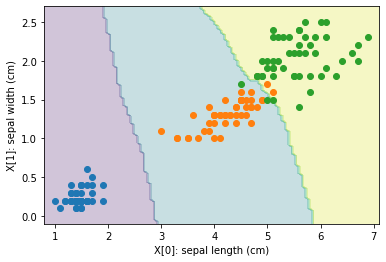

In [21]:
from sklearn.neighbors import KNeighborsClassifier
plotDecisao(KNeighborsClassifier(11), X, y)

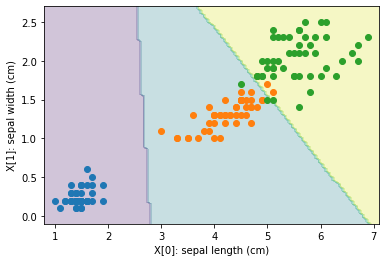

In [22]:
from sklearn.linear_model import LogisticRegression
plotDecisao(LogisticRegression(), X, y)

In [30]:
def impurezaValor(x, y, valor):
    maiores = x>valor
    impurezaMaiores = impureza(y[maiores])
    propMaiores = sum(maiores)/len(y)
    impurezaMenores = impureza(y[~maiores])
    propMenores = sum(~maiores)/len(y)
    impurezaTotal = impurezaMaiores*propMaiores + impurezaMenores*propMenores
    return impurezaTotal, impurezaMaiores, impurezaMenores

impurezaValor(X[:, 0], y, 2.5)

(0.3333333333333333, 0.5, 0.0)

In [24]:
import math
def melhorValor(x, y):
   result = None
   menorImpureza = float('inf')
   xmax = np.max(x)
   xmin = np.min(x)
   while True:
        #valor = (xmin+xmax)/2
        #valor = (2*xmin*xmax)/(xmin+xmax)
        #valor = np.median(x)
        valor = math.sqrt(xmin*xmax)
        impTotal, impMaiores, impMenores =  impurezaValor(x, y, valor)
        if impTotal < menorImpureza:
            menorImpureza = impTotal
            result = valor
            if impMaiores == 0 or impMenores == 0:
                break
            if impMaiores < impMenores:
                xmin = valor
            else:
                xmax = valor
        else:
            break
   return result, menorImpureza

melhorValor(X[:,0], y)

(2.6267851073127395, 0.3333333333333333)

In [25]:
import math
def melhorValor(x, y):
   result = None
   menorImpureza = float('inf')
   xmax = np.max(x)
   xmin = np.min(x)
   while True:
        valor = (xmin+xmax)/2
        #valor = (2*xmin*xmax)/(xmin+xmax)
        #valor = np.median(x)
        #valor = math.sqrt(xmin*xmax)
        impTotal, impMaiores, impMenores =  impurezaValor(x, y, valor)
        if impTotal < menorImpureza:
            menorImpureza = impTotal
            result = valor
            if impMaiores == 0 or impMenores == 0:
                break
            if impMaiores < impMenores:
                xmin = valor
            else:
                xmax = valor
        else:
            break
   return result, menorImpureza

melhorValor(X[:,0], y)

(2.475, 0.3333333333333333)

In [26]:
def melhorCaracteristica(X, y):
    impurezas = []
    valores =  []
    for caracteristica in range(X.shape[1]):
      valor, imp = melhorValor(X[:, caracteristica], y)
      impurezas.append(imp) 
      valores.append(valor)
    impurezas = np.array(impurezas)
    caracteristica = np.argmin(impurezas)
    return caracteristica, valores[caracteristica], impurezas[caracteristica]

print(melhorCaracteristica(X, y))



(0, 2.475, 0.3333333333333333)


In [27]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class Arvore(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.caracteristica, self.valor, self.imp = melhorCaracteristica(X, y)
        maiores = X[:,self.caracteristica] > self.valor
        if sum(maiores)>0 and sum(~maiores)>0:
            self.maiores = Arvore()
            self.maiores.fit(X[maiores,:],y[maiores])
            self.menores = Arvore()
            self.menores.fit(X[~maiores,:],y[~maiores])
        else:
            self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if hasattr(self, 'resposta'):
            y[:] = self.resposta
        else:
            maiores = X[:,self.caracteristica] > self.valor
            y[maiores] = self.maiores.predict(X[maiores,:])
            y[~maiores] = self.menores.predict(X[~maiores,:])
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9933333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

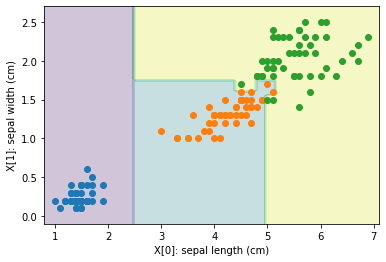

In [28]:
plotDecisao(Arvore(), X, y)

In [29]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Arvore(), X, y)
scores['test_score'], np.mean(scores['test_score'])

(array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]),
 0.9533333333333334)